# Making a CMD for your Star Cluster

This notebook introduces a few commands that you'll need to make the Color Magnitude Diagram for your star cluster. You can also use the cells below to write code for your unit project.

## .loc[ ] indexing

In [76]:
import pandas as pd

In [77]:
# Here we create a sample dataframe
sample_df = pd.DataFrame({"column 1": [20,50,15,50,65,50,10], "column 2": [0,1,1,1,0,0,1]})
sample_df

,column 1,column 2
0,20,0
1,50,1
2,15,1
3,50,1
4,65,0
5,50,0
6,10,1


You can use the .loc index method to select all the items in one column which have a particular value in the second column. For example, we may want to select all items from column 1 that have a value of 0 in column 2.

Run the code below to see how this works.

In [78]:
# This code selects all values from column 1 where the value on that same row in column 2 is equal to 0
sample_df["column 1"].loc[sample_df["column 2"] == 0]

0    20
4    65
5    50
Name: column 1, dtype: int64

Now you try! Select all the values from column 1 where the value on that same row in column 2 is equal to 1.

In [79]:
sample_df["column 1"].loc[sample_df["column 2"] == 1]

1    50
2    15
3    50
6    10
Name: column 1, dtype: int64

Now select all the values from column 2 where the value on that same row in column 1 is equal to 50.

In [80]:
sample_df["column 2"].loc[sample_df["column 1"] == 50]

1    1
3    1
5    0
Name: column 2, dtype: int64

#### Note: You can store these selected values in a variable, just like you've done with entire columns!

## Finding absolute magnitude

You will need to convert "G" to absolute magnitude for your CMD.

Look in the dataset for distance. Using G and distance, you can calculate absolute magnitude using the following equation:

absolute magnitude = G - 5 * log(distance) + 5

In [81]:
# You will need to import numpy
import numpy as np

In [103]:
df = df = pd.read_csv("oh_table.csv")
df.head()

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size
0,659,49809491645958528,TYC 1253-388-1,59.457281,18.562195,7.7395,129.949,11.160,9.984,NaN,NaN,NaN,0,151
1,1559,66939848447027584,TYC 1804-1924-1,57.070387,25.214932,7.6087,132.557,9.066,8.137,20120109_0346p23_140,2.95,1.6,0,151
2,1904,50905051903831680,HIP 18091,58.003444,19.596690,6.7611,148.752,10.265,9.267,NaN,NaN,NaN,0,151
3,1929,51452746133437696,HIP 18544,59.507154,20.676596,7.6989,131.839,9.249,8.436,NaN,NaN,NaN,0,151
4,1944,51619115986889472,TYC 1261-1630-1,58.370320,20.907178,7.4847,134.194,11.553,10.096,NaN,NaN,NaN,0,151


In [83]:
# You can use this function in your code to find the log of distance:
G = df["G"].loc[df["group_id"] == 2]
D = df["distance"].loc[df["group_id"] == 2]
J = df["J"].loc[df["group_id"] == 2]
am = G - 5 * np.log10(D) + 5
am.head(5)
# np.log10()

276    3.117943
277    6.369445
278    4.520155
279    5.631102
280    5.734546
dtype: float64

In [106]:
sun = df["name"].loc[df["distance"] == 1]
print(sun)

Series([], Name: name, dtype: object)


### Your first task is to create a Color Magnitude Diagram for your star cluster
You can use as many of the cells below as you need. You can add new cells with the "+" button.

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mpl
%matplotlib inline

In [130]:
cm = plt.cm.get_cmap("RdYlBu_r")

In [131]:
color = G - J

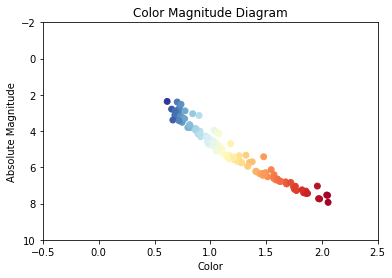

In [132]:
plt.clf()
plt.scatter(color , am, c = color, s=35, cmap=cm, norm=mpl.LogNorm())
plt.xlim(-0.5, 2.5)
plt.ylim(-2, 10)
plt.xlabel("Color")
plt.ylabel("Absolute Magnitude")
plt.title("Color Magnitude Diagram")
plt.gca().invert_yaxis()
plt.savefig("Color Magnitude Diagram")
plt.show()

### Coding Challenge 1: Add the sun to your color magnitude diagram

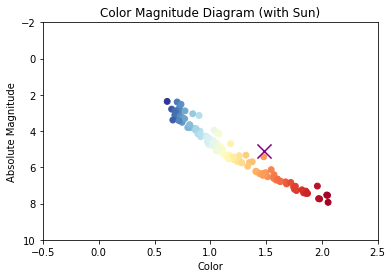

In [133]:
SunJ = 3.64
SunG = 5.12
H = SunG - SunJ
plt.scatter(color , am, c = color, s=35, cmap=cm, norm=mpl.LogNorm())
plt.scatter(H, SunG , c='purple', s=200, marker='x')
plt.xlim(-0.5, 2.5)
plt.ylim(-2, 10)
plt.xlabel("Color")
plt.ylabel("Absolute Magnitude")
plt.title("Color Magnitude Diagram (with Sun)")
plt.gca().invert_yaxis()
plt.savefig("Color Magnitude Diagram (with Sun)")
plt.show()

In [101]:
print(len(color))
print(len(am))

118
118


### Coding Challenge 2: Add a colormap to your diagram

### Coding Challenge 3: Create histograms for the absolute magnitude and color of your star cluster

In [109]:
print(color.min())
print(color.max())

0.613
2.055


/Users/student/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/student/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


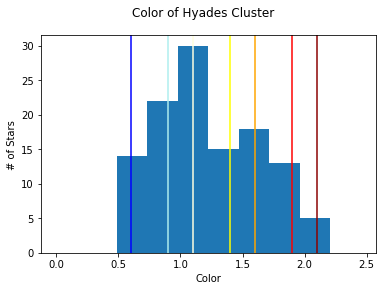

In [165]:
#Color histogram
plt.hist(color, 10, range = [0, 2.45])
plt.suptitle("Color of Hyades Cluster")
#Creating to show color
plt.axvline(0.6 , color = "blue")
plt.axvline(0.9, color = "paleturquoise")
plt.axvline(1.4, color ="yellow")
plt.axvline(1.1, color = "lightyellow")
plt.axvline(1.6, color = "orange")
plt.axvline(1.9, color = "red")
plt.axvline(2.1, color = "darkred")
#Labels and Saving
plt.xlabel("Color")
plt.ylabel("# of Stars")
plt.savefig("Color of Hyades hist")
plt.show()

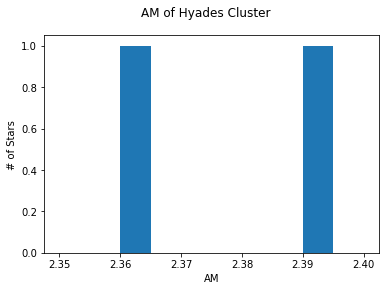

In [163]:
#absolute magnitude/ brightness histogram
plt.hist(am, 10, range = [2.35, 2.40])
plt.suptitle("AM of Hyades Cluster")
plt.xlabel("AM")
plt.ylabel("# of Stars")
plt.savefig("AM of Hyades hist")
plt.show()